## $\color{SkyBlue}{\text{Hypothesis 1}}$
#### $\color{SkyBlue}{\text{Cole Krant}}$

### Description

To what extend to a players height and weight contribute to the teams overall performance?

<br>
<br>

$\rule{27cm}{0.4pt}$ 
### Import Libraries

In [1]:
import numpy as np
import pandas as pd

$\rule{27cm}{0.4pt}$
### K-Means Algorithm

In [2]:
#--------------------------------------------------------------------------------#
def dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)
#--------------------------------------------------------------------------------#

In [3]:
#--------------------------------------------------------------------------------#
def kMeans(df, k=4, tol=0.05): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #---------------------------------------#
    #-- Initialize --#
    clusters = np.zeros(len(df))
    centroids = df.sample(k).values
    mean_error = np.inf
    converged = False
    
    num_iterations = 0
    
    #---------------------------------------#
    #-- LOOP UNTIL CONVERGENCE --#
    while not(converged):
        
        #-- Cluster Assignment --#
        for index, data in enumerate(df.values):
            distances = [dist(data, centroid) for centroid in centroids]
            clusters[index] = np.argmin(distances)
        
        #-- Update Centroids --#
        updated_centroids = np.empty((k, df.shape[1]))
        for index in range(k):
            clust_data = df[clusters == index]
            centroid = clust_data.mean(axis=0)
            updated_centroids[index, :] = centroid
            
        #-- Calculate Meanerror --#
        errors = []
        for data, cluster in zip(df.values, clusters):
            centroid = updated_centroids[int(cluster)]
            errors.append(dist(data, centroid)**2)
        
        error_arr = np.array(errors)
        
        #-- Calculate Reconstruction Error --#
        rec_err = np.sum(error_arr)/len(df)
        
        #-- Check for Convergence --#
        if (abs(rec_err - mean_error) < tol):
            converged = True
#             print('Converged at iteration {} with a change of {}'.format(num_iterations, abs(rec_err - mean_error)))
        
        # Update Values
        centroids = updated_centroids
        mean_error = rec_err
        num_iterations = num_iterations + 1
        
    #---------------------------------------#
    return centroids, clusters, mean_error
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Dataframe Composition

In [4]:
#--------------------------------------------------------------------------------#
## Statistics for each team, by season
### Basic Info
#   id
#   player name
#   team abbreviation
#   age
#   player height
#   player weight
df_seasons = pd.read_csv("data/all_seasons.csv")
df_seasons = df_seasons[["id", "player_name", "team_abbreviation", "age", "player_height", "player_weight"]]
df_seasons.head()
# print(df_seasons.shape)
#--------------------------------------------------------------------------------#

,id,player_name,team_abbreviation,age,player_height,player_weight
0,0,Randy Livingston,HOU,22.0,193.04,94.800728
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480
2,2,George Lynch,VAN,26.0,203.20,103.418976
3,3,George McCloud,LAL,30.0,203.20,102.058200
4,4,George Zidek,DEN,23.0,213.36,119.748288


In [5]:
#--------------------------------------------------------------------------------#
## Team Statistics
#   full name
#   abbreviation (id)
df_team = pd.read_csv("data/team.csv")
df_team = df_team[["full_name", "abbreviation"]]
# df_team.head()

## Rankings
#   Abbreviation (id)
#   Rank
#   Year
#   Conference
df_rankings = pd.read_csv("data/rankings.csv")
df_rankings.head()
#--------------------------------------------------------------------------------#

,Team,Rank,Year,Converence
0,Denver Nuggets*,1,2023,West
1,Memphis Grizzlies*,2,2023,West
2,Sacramento Kings*,3,2023,West
3,Phoenix Suns*,4,2023,West
4,Golden State Warriors*,5,2023,West


### Dataframe Concatenation

In [69]:
#--------------------------------------------------------------------------------#
## Master Dataframe
#   for each player
#      age
#      height
#      weight
#      full_name (team name)
#      team_abbreviation
#      rank
#      year

## Merge with Seasons
df = pd.merge(df_seasons, df_team, left_on="team_abbreviation", right_on="abbreviation")
df = df[["player_name", "team_abbreviation", "age", "player_height", "player_weight", "full_name"]]

## Merge with Rankings
df = pd.merge(df, df_rankings, left_on="full_name", right_on="Team")
print(df_rankings)

#--------------------------------------------------------------------------------#
### Pseudocode
# Objective: create a dataframe with the following columns
#       Loop through each year
#           Create a smaller dataframe with the given year
#           Loop through each team
#               Calculate average height of the team
#               Append the team, average height, and year to the new dataframe

# New Master Dataframe
dict = {'Team' : [], 'Avg_Height' : [], 'Avg_Weight' : [], 'Year' : [], 'Rank' : []}
dfMaster = pd.DataFrame(dict)

# Get all unique years and teams
years = df["Year"].unique()                    # get all unique years
teams = df["team_abbreviation"].unique()       # get all unique teams

##-- Loop through each year --##
for year in range(len(years)):

    # Create a smaller dataframe with the given year
    df_year = df[df["Year"] == years[year]]

    ##-- Loop through each team --##
    for team in range(len(teams)):

        # Calculate average height of the team
        avg_height = df_year[df_year["team_abbreviation"] == teams[team]]["player_height"].mean()  # calculate average height of the team
        avg_weight = df_year[df_year["team_abbreviation"] == teams[team]]["player_weight"].mean()  # calculate average height of the team
        rank = df_year[df_year["team_abbreviation"] == teams[team]]["Rank"].mean()  # calculate average height of the team

        # Append the team, average height, and year to the new dataframe
        temp = {'Team' : teams[team], 'Avg_Height' : avg_height, 'Avg_Weight': avg_weight, 'Year' : years[year], 'Rank': rank}             # create a temporary dataframe
        df_temp = pd.DataFrame(temp, index=[0])

        dfMaster = pd.concat([dfMaster, df_temp], ignore_index = True)                             # append the temporary dataframe to the master dataframe
        dfMaster = dfMaster.reset_index(drop=True)


#--------------------------------------------------------------------------------#
dfMaster.head(5)

                       Team  Rank  Year Converence
0           Denver Nuggets*     1  2023       West
1        Memphis Grizzlies*     2  2023       West
2         Sacramento Kings*     3  2023       West
3             Phoenix Suns*     4  2023       West
4    Golden State Warriors*     5  2023       West
..                      ...   ...   ...        ...
175         New York Knicks    11  2018       East
176           Brooklyn Nets    12  2018       East
177           Chicago Bulls    13  2018       East
178           Orlando Magic    14  2018       East
179           Atlanta Hawks    15  2018       East

[180 rows x 4 columns]


,Team,Avg_Height,Avg_Weight,Year,Rank
0,HOU,200.491455,100.949284,2023.0,15.0
1,WAS,200.786425,100.302327,2023.0,12.0
2,LAL,NaN,NaN,2023.0,NaN
3,DEN,NaN,NaN,2023.0,NaN
4,ORL,200.268318,99.430970,2023.0,13.0


In [38]:
#--------------------------------------------------------------------------------#
## Drop the useless data
dfMaster.dropna(inplace=True)
# print(dfMaster.head(100))

## Split into by year
df_18 = dfMaster[dfMaster["Year"] == 2018]
df_19 = dfMaster[dfMaster["Year"] == 2019]
df_20 = dfMaster[dfMaster["Year"] == 2020]
df_21 = dfMaster[dfMaster["Year"] == 2021]
df_22 = dfMaster[dfMaster["Year"] == 2022]
df_23 = dfMaster[dfMaster["Year"] == 2023]

#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Begin K-Mean Analysis HEIGHT

In [62]:
#--------------------------------------------------------------------------------#
## Use k-Means for clustering
centroids_23, clusters_23, mean_error_23 = kMeans(df_23[["Rank", "Avg_Height"]], k=3)
centroids_22, clusters_22, mean_error_22 = kMeans(df_22[["Rank", "Avg_Height"]], k=3)
centroids_21, clusters_21, mean_error_21 = kMeans(df_21[["Rank", "Avg_Height"]], k=3)
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "Avg_Height"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "Avg_Height"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "Avg_Height"]], k=3)
#--------------------------------------------------------------------------------#

### Plot the resulting graph

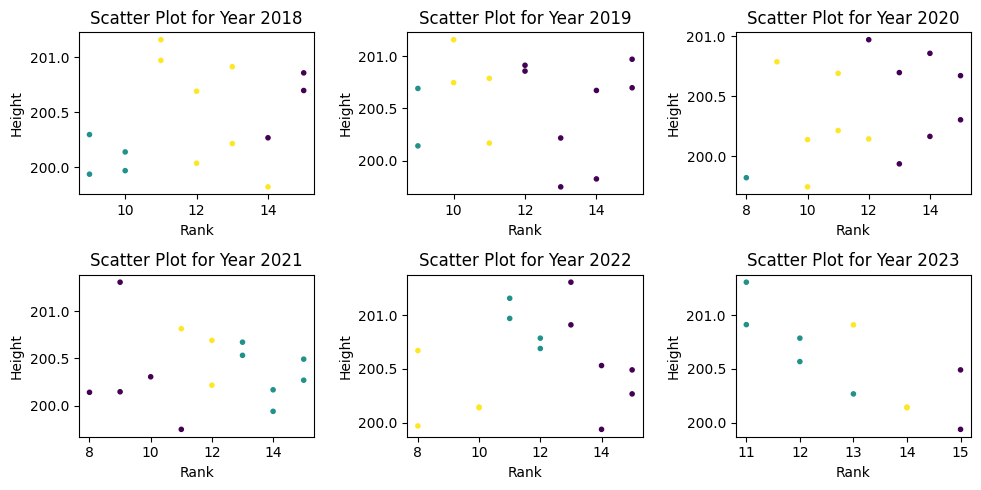

In [64]:
#--------------------------------------------------------------------------------#
import matplotlib.pyplot as plt

## Create lists to use for loop iteration for plotting
#  dataframes, contains all the dataframes for each year
#  clusters, contains all the clusters for each year
#  years, contains all the years

dataframes = [df_18, df_19, df_20, df_21, df_22, df_23]
clusters = [clusters_18, clusters_19, clusters_20, clusters_21, clusters_22, clusters_23]
years = [2018, 2019, 2020, 2021, 2022, 2023]

## Initialize Plot
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

## LOOP : Scatter Plot for each Year
for i, (year, dataframe) in enumerate(zip(years, dataframes)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['Avg_Height'], c=clusters[i], marker='.')
    ax.set_xlabel("Rank")
    ax.set_ylabel("Height")
    ax.set_title("Scatter Plot for Year " + str(year))

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### k-Mean Analysis WEIGHT

In [65]:
#--------------------------------------------------------------------------------#
centroids_23, clusters_23, mean_error_23 = kMeans(df_23[["Rank", "Avg_Weight"]], k=3)
centroids_22, clusters_22, mean_error_22 = kMeans(df_22[["Rank", "Avg_Weight"]], k=3)
centroids_21, clusters_21, mean_error_21 = kMeans(df_21[["Rank", "Avg_Weight"]], k=3)
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "Avg_Weight"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "Avg_Weight"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "Avg_Weight"]], k=3)
#--------------------------------------------------------------------------------#

### Plot the resulting Graph

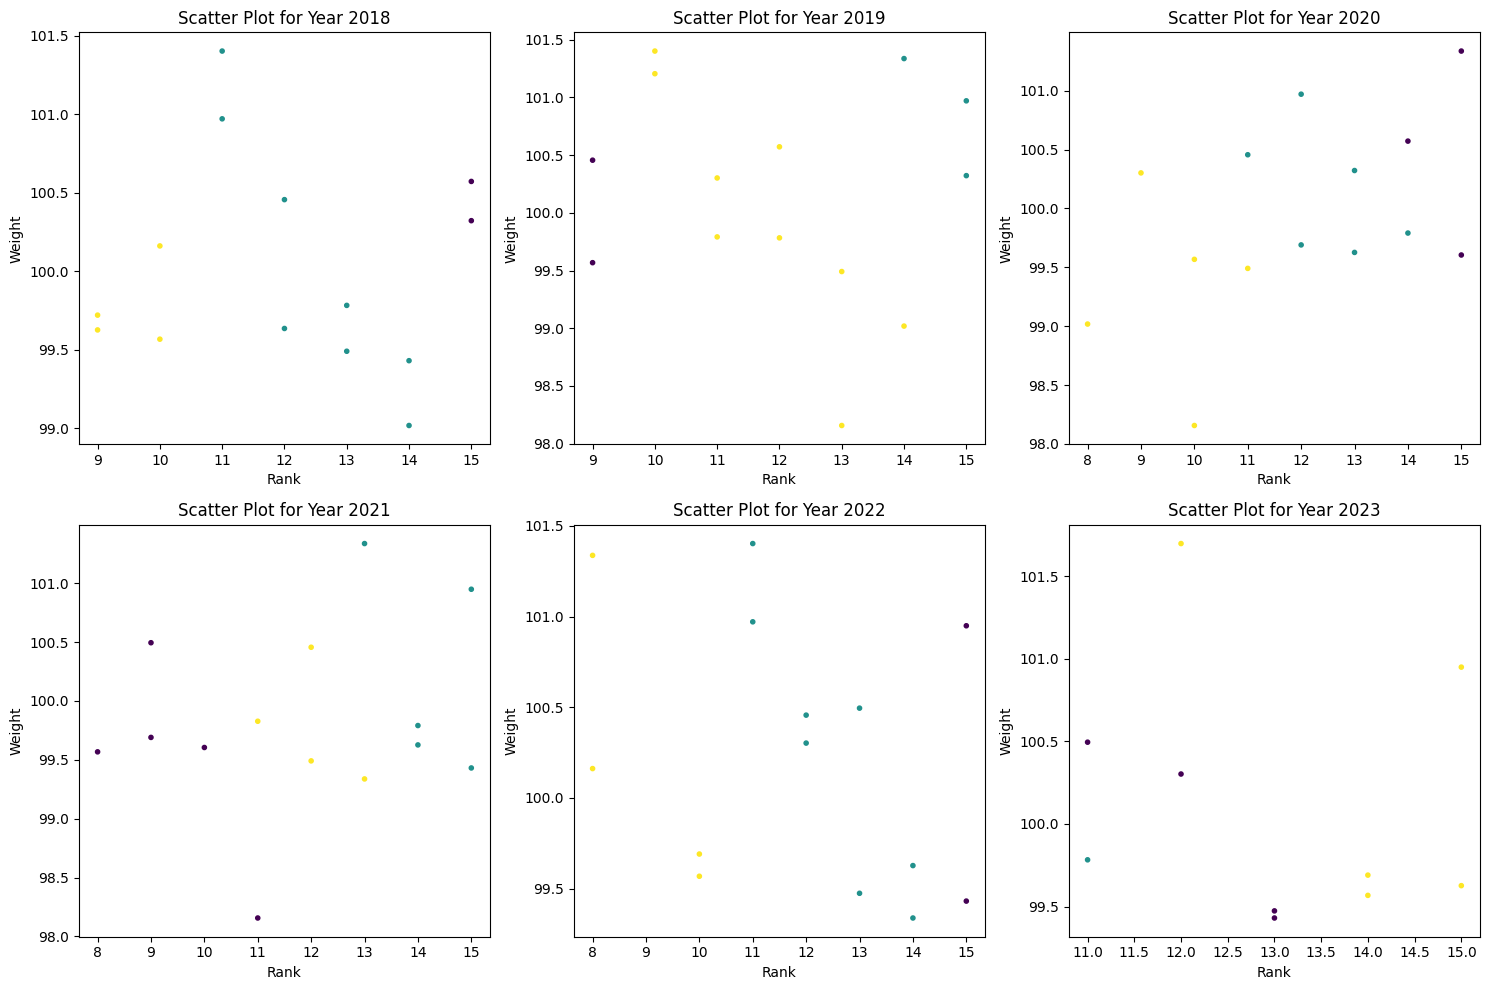

In [71]:
#--------------------------------------------------------------------------------#
import matplotlib.pyplot as plt

## Create lists to use for loop iteration for plotting
#  dataframes, contains all the dataframes for each year
#  clusters, contains all the clusters for each year
#  years, contains all the years

dataframes = [df_18, df_19, df_20, df_21, df_22, df_23]
clusters = [clusters_18, clusters_19, clusters_20, clusters_21, clusters_22, clusters_23]
years = [2018, 2019, 2020, 2021, 2022, 2023]

## Initialize Plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

## LOOP : Scatter Plot for each Year
for i, (year, dataframe) in enumerate(zip(years, dataframes)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['Avg_Weight'], c=clusters[i], marker='.')
    ax.set_xlabel("Rank")
    ax.set_ylabel("Weight")
    ax.set_title("Scatter Plot for Year " + str(year))

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Analysis

Simply by looking at the average height and weight of each team across the years, it seems to have little affect on their final ranking for the season.

I attribute this to a couple reasons
1. Most teams have tall players
2. Averaging the team could make two very different teams seem equal: one where are all more or less the average height, and one where there are lots of very tall and very short people.

If we were to take this a step further, I would compare the heights and weights of each player given their position. This would solve the issues above.

Furthermore, clustering is pretty useless on these plots. The higher ranked teams are clustered closer together than the lower ranked teams, but in most cases they have the same height or weight. So it appears that feature has little affect on the clustering.